https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm

Context
COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) is a popular commercial algorithm used by judges
and parole officers for scoring criminal defendant’s likelihood of reoffending (recidivism). It has been shown that the algorithm
is biased in favor of white defendants, and against black inmates, based on a 2 year follow up study (i.e who actually committed
crimes or violent crimes after 2 years). The pattern of mistakes, as measured by precision/sensitivity is notable.

Quoting from ProPublica: 

Black defendants were often predicted to be at a higher risk of recidivism than they actually were. Our analysis found that black defendants
who did not recidivate over a two-year period were nearly twice as likely to be misclassified as higher risk compared to their white counterparts
(45 percent vs. 23 percent). White defendants were often predicted to be less risky than they were. Our analysis found that white defendants who
re-offended within the next two years were mistakenly labeled low risk almost twice as often as black re-offenders (48 percent vs. 28 percent).
The analysis also showed that even when controlling for prior crimes, future recidivism, age, and gender, black defendants were 45 percent more
likely to be assigned higher risk scores than white defendants.

Black defendants were also twice as likely as white defendants to be misclassified as being a higher risk of violent recidivism. And white violent
recidivists were 63 percent more likely to have been misclassified as a low risk of violent recidivism, compared with black violent recidivists.
The violent recidivism analysis also showed that even when controlling for prior crimes, future recidivism, age, and gender, black defendants were
77 percent more likely to be assigned higher risk scores than white defendants. "

Content
Data contains variables used by the COMPAS algorithm in scoring defendants, along with their outcomes within 2 years of the decision, for over
10,000 criminal defendants in Broward County, Florida. 3 subsets of the data are provided, including a subset of only violent
recividism (as opposed to, e.g. being reincarcerated for non violent offenses such as vagrancy or Marijuana).

Indepth analysis by ProPublica can be found in their data methodology article.



Each pretrial defendant received at least three COMPAS scores:  (DisplayText)
“Risk of Recidivism,”
“Risk of Violence” 
“Risk of Failure to Appear.”

COMPAS scores for each defendant ranged from1 to 10, with ten being the highest risk. Scores (ScoreTex)
1 to 4 were labeled by COMPAS as “Low”;
5 to 7 were labeled “Medium”; and
8 to 10 were labeled “High.”


Columns
0 - 4  : 'Person_ID','AssessmentID','Case_ID','Agency_Text', 'LastName',
5 - 9  : 'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text','DateOfBirth',
10 - 14: 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason','Language', 'LegalStatus',
15 - 19: 'CustodyStatus', 'MaritalStatus','Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
20 - 24: 'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
25 - 27: 'AssessmentType', 'IsCompleted', 'IsDeleted'

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load dataset
path = 'C:\\Users\\rivas\\OneDrive\\Documents\\JMR\\Education\\Springboard\\Projects\\Capstone2\\'
int_fnm = path + 'data\\compass\\compas-scores-raw.csv'
df = pd.read_csv(int_fnm)

In [3]:
# initial EDA
print(df.shape)
print(df.info())

(60843, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
Person_ID                  60843 non-null int64
AssessmentID               60843 non-null int64
Case_ID                    60843 non-null int64
Agency_Text                60843 non-null object
LastName                   60843 non-null object
FirstName                  60843 non-null object
MiddleName                 15648 non-null object
Sex_Code_Text              60843 non-null object
Ethnic_Code_Text           60843 non-null object
DateOfBirth                60843 non-null object
ScaleSet_ID                60843 non-null int64
ScaleSet                   60843 non-null object
AssessmentReason           60843 non-null object
Language                   60843 non-null object
LegalStatus                60843 non-null object
CustodyStatus              60843 non-null object
MaritalStatus              60843 non-null object
Screening_Date             60843 non-null object
R

In [4]:
print(pd.value_counts(df['Ethnic_Code_Text']))
print(pd.value_counts(df['DecileScore']))

African-American    27018
Caucasian           21783
Hispanic             8742
Other                2592
Asian                 324
Native American       219
Arabic                 75
African-Am             51
Oriental               39
Name: Ethnic_Code_Text, dtype: int64
 1     18465
 2      9192
 3      8492
 4      5338
 5      4831
 6      4319
 7      3338
 8      2799
 9      2386
 10     1638
-1        45
Name: DecileScore, dtype: int64


In [5]:
# Data Cleanup

#  update 'Ethnic_Code_Text' to have conistent values for African Americans
df.Ethnic_Code_Text.unique()
df.loc[df['Ethnic_Code_Text'] == 'African-Am', 'Ethnic_Code_Text'] = 'African-American'
pd.value_counts(df['Ethnic_Code_Text'])
          

African-American    27069
Caucasian           21783
Hispanic             8742
Other                2592
Asian                 324
Native American       219
Arabic                 75
Oriental               39
Name: Ethnic_Code_Text, dtype: int64

In [6]:
# DecileScore should be between 1 & 10, delete otherwise
df.DecileScore.unique()
(df['DecileScore'] < 1).sum()
# remove DecileScore < 1
df = df[df.DecileScore >= 1]
(df['DecileScore'] < 1).sum()
pd.value_counts(df['DecileScore'])

1     18465
2      9192
3      8492
4      5338
5      4831
6      4319
7      3338
8      2799
9      2386
10     1638
Name: DecileScore, dtype: int64

In [7]:
# Slice by 'Ethnic_Code_Text' for blacks & whites
black = df.loc[df['Ethnic_Code_Text'] == 'African-American']
white = df.loc[df['Ethnic_Code_Text'] == 'Caucasian']
joint = df.loc[df['Ethnic_Code_Text'].isin (['Caucasian','African-American'])]
print('black :', black.shape, ' white: ', white.shape, ' joint: ', joint.shape)

black : (27053, 28)  white:  (21765, 28)  joint:  (48818, 28)


In [8]:
# Slice by 'Sex_Code_Text' for males & females
male = df.loc[df['Sex_Code_Text'] == 'Male']
female = df.loc[df['Sex_Code_Text'] == 'Female']
print('male :', male.shape, ' female: ', female.shape)

male : (47479, 28)  female:  (13319, 28)


In [9]:
# Aggregate
grprace = df.groupby(['Ethnic_Code_Text']).count()
grpgender = df.groupby(['Sex_Code_Text']).count()
print('Race: ',grprace.shape, ' Gender:', grpgender.shape)

Race:  (8, 27)  Gender: (2, 27)


In [10]:
## Display group data
# % data distribution by Ethnic_Code_Text
round(grprace[['DecileScore']]/len(df),4)*100

,DecileScore
Ethnic_Code_Text,
African-American,44.50
Arabic,0.12
Asian,0.53
Caucasian,35.80
Hispanic,14.36
Native American,0.36
Oriental,0.06
Other,4.26


In [11]:
# % data distribution by Sex_Code_Text
round(grpgender[['DecileScore']]/len(df),4)*100

,DecileScore
Sex_Code_Text,
Female,21.91
Male,78.09


In [12]:
#########################################################################################
# EDA

# DecileScore Mean by race
race=df.Ethnic_Code_Text.unique()
print('Mean DecileScore by Race')
for i in race:
    mn = round(df.loc[df['Ethnic_Code_Text'] == i]['DecileScore'].mean(), 2)
    print(i,'- ',mn)

Mean DecileScore by Race
Caucasian -  3.11
African-American -  4.29
Hispanic -  2.86
Other -  2.51
Asian -  2.37
Native American -  4.05
Oriental -  2.74
Arabic -  3.13


In [13]:
# DecileScore Mean by gender
gender=df.Sex_Code_Text.unique()
print('Mean DecileScore by Gender')
for i in gender:
    mn = round(df.loc[df['Sex_Code_Text'] == i]['DecileScore'].mean(), 2)
    print(i,'- ',mn)

Mean DecileScore by Gender
Male -  3.66
Female -  3.26


In [14]:
####################################################################################
# Define grp_plot_compare:
# creates groups and then plot them to compare them
def grp_plot_compare(df1, df2, xlabel1, colnm1, total_pop, multby, title,label1, label2):
    grp1 = df1.groupby([xlabel1]).count()
    grp2 = df2.groupby([xlabel1]).count()
    
#   to be used for weighted average  
    div1 = len(df1)
    div2 = len(df2)
    
    n_groups = len(grp1)
# create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(grp1.index,(round(grp1[colnm1]/div1,2)*multby), bar_width,
                 alpha=opacity,
                 color='b',
                 label=label1)

    rects2 = plt.bar(grp2.index+ bar_width, (round(grp2[colnm1]/div2,2)*multby), bar_width,
                 alpha=opacity,
                 color='g',
                 label=label2)

    plt.xlabel(xlabel1)
    if total_pop > 1:
        plt.ylabel('Percentage')
    else:
        plt.ylabel('Count')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.clf()

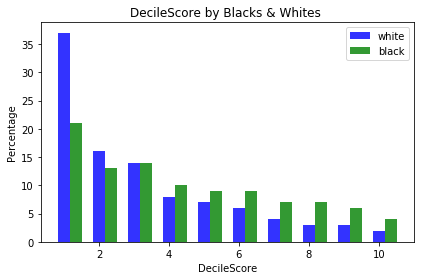

In [16]:
# Comparing White & Black defendants on the  'DecileScore'
grp_plot_compare(white, black, 'DecileScore','Ethnic_Code_Text', len(df), 100, \
                 'DecileScore by Blacks & Whites ', \
                 'white','black')

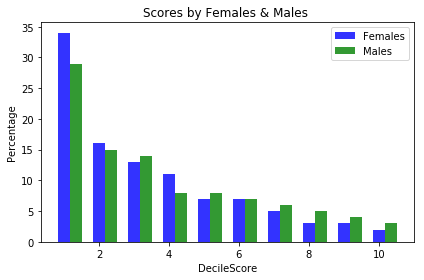

In [17]:
# Comparing Male & Female defendants on the  'DecileScore'
grp_plot_compare(female, male, 'DecileScore','Sex_Code_Text', len(df), 100, \
                 'Scores by Females & Males ', \
                 'Females','Males')

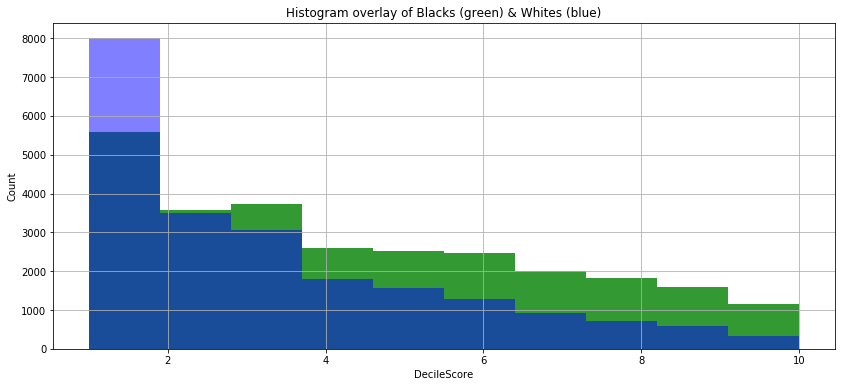

In [18]:
# Histogram overlay
fig, ax = plt.subplots()
black['DecileScore'].hist(bins=10, figsize=[14,6],color='g',alpha=.8 )
white['DecileScore'].hist(bins=10, figsize=[14,6],color='b',alpha=.5 )
plt.title('Histogram overlay of Blacks (green) & Whites (blue)')
plt.legend()
plt.xlabel('DecileScore')
plt.ylabel('Count')
plt.show()
plt.clf()

In [19]:
# Prepare data to for ML: Gaussian Naive Bayes Classifier

# Import libraries

# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [20]:
# Create new DataFrame of selected columns
"""
Columns
0 - 4  : 'Person_ID','AssessmentID','Case_ID','Agency_Text', 'LastName',
5 - 9  : 'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text','DateOfBirth',
10 - 14: 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason','Language', 'LegalStatus',
15 - 19: 'CustodyStatus', 'MaritalStatus','Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
20 - 24: 'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
25 - 27: 'AssessmentType', 'IsCompleted', 'IsDeleted'
"""

# slice for subset data features and targets
df_subset = df.iloc[:, [0,1,2,3,4,5,7,8,9,11,12,13,14,15,16,17,19,21]] #features
y = df.iloc[:,23] #target

In [21]:
#  One-Hot encoder. It encodes the data into binary format
le = preprocessing.LabelEncoder()
Agency_Text_cat = le.fit_transform(df_subset.Agency_Text)
LastName_cat = le.fit_transform(df_subset.LastName)
FirstName_cat = le.fit_transform(df_subset.FirstName)
Sex_Code_Text_cat = le.fit_transform(df_subset.Sex_Code_Text)
Ethnic_Code_Text_cat = le.fit_transform(df_subset.Ethnic_Code_Text)
DateOfBirth_cat = le.fit_transform(df_subset.DateOfBirth)
ScaleSet_cat = le.fit_transform(df_subset.ScaleSet)
AssessmentReason_cat = le.fit_transform(df_subset.AssessmentReason)
Language_cat = le.fit_transform(df_subset.Language)
LegalStatus_cat = le.fit_transform(df_subset.LegalStatus)
CustodyStatus_cat = le.fit_transform(df_subset.CustodyStatus)
MaritalStatus_cat = le.fit_transform(df_subset.MaritalStatus)
Screening_Date_cat = le.fit_transform(df_subset.Screening_Date)
RecSupervisionLevelText_cat = le.fit_transform(df_subset.RecSupervisionLevelText)
DisplayText_cat = le.fit_transform(df_subset.DisplayText)
#

In [22]:
#initialize the encoded categorical columns
df_rev = df_subset
df_rev['Agency_Text_cat'] = Agency_Text_cat
df_rev['LastName_cat'] = LastName_cat
df_rev['FirstName_cat'] = FirstName_cat
df_rev['Sex_Code_Text_cat'] = Sex_Code_Text_cat
df_rev['Ethnic_Code_Text_cat'] = Ethnic_Code_Text_cat
df_rev['DateOfBirth_cat'] = DateOfBirth_cat
df_rev['ScaleSet_cat'] = ScaleSet_cat
df_rev['AssessmentReason_cat'] = AssessmentReason_cat
df_rev['Language_cat'] = Language_cat
df_rev['LegalStatus_cat'] = LegalStatus_cat
df_rev['CustodyStatus_cat'] = CustodyStatus_cat
df_rev['MaritalStatus_cat'] = MaritalStatus_cat
df_rev['Screening_Date_cat'] = Screening_Date_cat
df_rev['RecSupervisionLevelText_cat'] = RecSupervisionLevelText_cat
df_rev['DisplayText_cat'] = DisplayText_cat

C:\Users\rivas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rivas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rivas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [23]:
#drop the old categorical columns from dataframe
dummy_fields = ['Agency_Text', 'LastName', 'FirstName', 'Sex_Code_Text',
                  'Ethnic_Code_Text', 'DateOfBirth', 'ScaleSet',
                  'AssessmentReason', 'Language', 'LegalStatus', 'CustodyStatus',
                  'MaritalStatus', 'Screening_Date', 'RecSupervisionLevelText', 'DisplayText' ]
df_rev = df_rev.drop(dummy_fields, axis = 1)
df_rev.columns

Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text_cat',
       'LastName_cat', 'FirstName_cat', 'Sex_Code_Text_cat',
       'Ethnic_Code_Text_cat', 'DateOfBirth_cat', 'ScaleSet_cat',
       'AssessmentReason_cat', 'Language_cat', 'LegalStatus_cat',
       'CustodyStatus_cat', 'MaritalStatus_cat', 'Screening_Date_cat',
       'RecSupervisionLevelText_cat', 'DisplayText_cat'],
      dtype='object')

In [24]:
# Standardizing
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df_rev)

In [25]:
# Split data train and test, first import library
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2)
print('Length for X_train:', len(X_train), ' X_test:',len(X_test), ' y_train:',len(y_train) ,' y_test:',len(y_test)) 

Length for X_train: 48638  X_test: 12160  y_train: 48638  y_test: 12160


In [26]:
#  GaussianNB 
Gclf = GaussianNB()
Gclf.fit(X_train, y_train)
y_pred = Gclf.predict(X_test)


In [27]:
# Evaluate
print(accuracy_score(y_test, y_pred, normalize = True))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

0.0859375
[[ 471    0    0    0    0    0    0 3233    0   85]
 [ 129    0    0    0    0    0    0 1685    0   78]
 [  78    0    0    0    0    0    0 1534    0  101]
 [  34    0    0    0    0    0    0  914    0   70]
 [  17    0    0    0    0    0    0  835    0   79]
 [   9    0    0    0    0    0    0  745    0   65]
 [   6    0    0    0    0    0    0  584    0   67]
 [   5    0    0    0    0    0    0  438    0  118]
 [   1    0    0    0    0    0    0  318    0  143]
 [   1    0    0    0    0    0    0  181    0  136]]
             precision    recall  f1-score   support

          1       0.63      0.12      0.21      3789
          2       0.00      0.00      0.00      1892
          3       0.00      0.00      0.00      1713
          4       0.00      0.00      0.00      1018
          5       0.00      0.00      0.00       931
          6       0.00      0.00      0.00       819
          7       0.00      0.00      0.00       657
          8       0.04      0.78  

C:\Users\rivas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
# KNN
from sklearn.neighbors import KNeighborsClassifier  
KNclf = KNeighborsClassifier(n_neighbors=5)  
KNclf.fit(X_train, y_train)
y_pred = KNclf.predict(X_test)

In [29]:
# Evaluate
print(accuracy_score(y_test, y_pred, normalize = True))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

0.33248355263157897
[[2787  481  297   83   68   28   23   10    8    4]
 [1097  309  243   93   54   49   24   12    8    3]
 [ 884  276  232  105   78   64   34   22   12    6]
 [ 455  168  132   90   52   65   32    8   11    5]
 [ 373  139  126   62   70   73   46   24   12    6]
 [ 185   91   83   52   64  178  107   37   15    7]
 [ 103   75   79   53   50  145   95   40   11    6]
 [ 105   56   33   30   22   32   32  129   95   27]
 [  54   28   42   14   17   24   25   97  104   57]
 [  40   27   24   20    4   10   18   56   70   49]]
             precision    recall  f1-score   support

          1       0.46      0.74      0.56      3789
          2       0.19      0.16      0.17      1892
          3       0.18      0.14      0.15      1713
          4       0.15      0.09      0.11      1018
          5       0.15      0.08      0.10       931
          6       0.27      0.22      0.24       819
          7       0.22      0.14      0.17       657
          8       0.30  